#### Importing the required libraries

In [1]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

#### Locating Data From Folder

- Train : contains the training data/images for teaching our model.
- Val : contains images which we will use to validate our model.
- Test : this contains the data that we use to test the model once it has learned the relationships between the images and their label (Pneumonia/Normal)

In [2]:
train_folder= './train/'
val_folder = './val/'
test_folder = './test/'

train_path = './train'
test_path = './test'
valid_path = './val'

batch_size = 32
img_height = 500
img_width = 500

#### Setting Up Training and Testing Folder

In [3]:
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

#### Checking Some of Picture and Testing Image Loaded Successful

1341
Normal picture title:  NORMAL2-IM-0665-0001.jpeg
Pneumonia picture title: person1391_bacteria_3536.jpeg


Text(0.5, 1.0, 'Pneumonia')

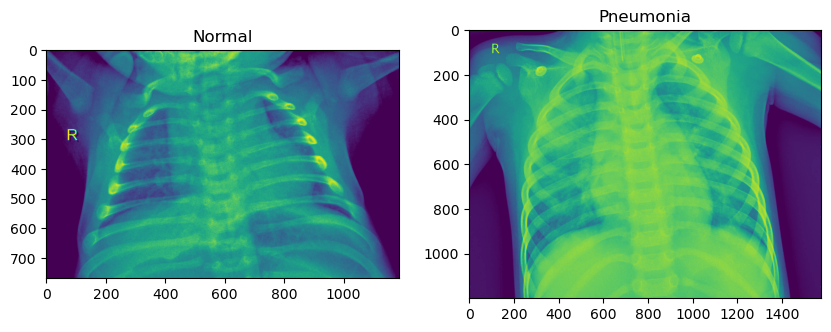

In [4]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('Normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('Pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

#### Building a convolutional Neural Network Model using Keras

In [5]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Generating a Summary Report of Our CNN

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 123, 123, 32)      0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 484128)            0         
                                                                 
 dense (Dense)               (None, 128)               6

#### Fitting The Model the dataset

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                               )

test_data_gen = ImageDataGenerator(rescale = 1./255)



training_set = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary',
      batch_size=batch_size
      )


validation_generator = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      shuffle=False,
      class_mode='binary',
      batch_size=batch_size
      )

test_set = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary',
      batch_size=batch_size
      )

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


#### Training a Convolutional Neural Network (CNN) Model on Image Data

- **epochs**: The epochs parameter specifies the number of times the model will iterate over the entire training set.For my model , i am setting it to 13, meaning the model will go through the entire training set 13 time.


In [8]:
cnn_model = cnn.fit(training_set,
                      epochs=13, 
                        validation_data=validation_generator)

Epoch 1/13


163/163 [==============================] - 757s 5s/step - loss: 0.9174 - accuracy: 0.8430 - val_loss: 0.5322 - val_accuracy: 0.7500
Epoch 2/13
163/163 [==============================] - 717s 4s/step - loss: 0.2301 - accuracy: 0.9036 - val_loss: 0.8872 - val_accuracy: 0.6250
Epoch 3/13
163/163 [==============================] - 722s 4s/step - loss: 0.1973 - accuracy: 0.9237 - val_loss: 0.5526 - val_accuracy: 0.7500
Epoch 4/13
163/163 [==============================] - 728s 4s/step - loss: 0.1817 - accuracy: 0.9252 - val_loss: 0.6119 - val_accuracy: 0.8125
Epoch 5/13
163/163 [==============================] - 721s 4s/step - loss: 0.1811 - accuracy: 0.9294 - val_loss: 0.6086 - val_accuracy: 0.7500
Epoch 6/13
163/163 [==============================] - 725s 4s/step - loss: 0.1866 - accuracy: 0.9302 - val_loss: 0.4946 - val_accuracy: 0.8750
Epoch 7/13
163/163 [==============================] - 721s 4s/step - loss: 0.1674 - accuracy: 0.9344 - val_loss: 0.8931 - val_accuracy: 0.68

#### Evaluating the Test Accuracy of a Trained Convolutional Neural Network (CNN) Model

In [9]:
test_accu = cnn.evaluate(test_set)

20/20 [==============================] - 46s 2s/step - loss: 0.6048 - accuracy: 0.8317


In [10]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 83.17307829856873 %


In [11]:
cnn.evaluate(test_set)

20/20 [==============================] - 30s 1s/step - loss: 0.6048 - accuracy: 0.8317


[0.6047788262367249, 0.8317307829856873]

In [12]:
preds = cnn.predict(test_set,verbose=1)

20/20 [==============================] - 30s 1s/step


In [13]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [14]:
# prompt: calculate precision, recall,f1

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(test_set.classes, predictions)
recall = recall_score(test_set.classes, predictions)
f1 = f1_score(test_set.classes, predictions)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 score: ', f1)

Precision:  0.6313645621181263
Recall:  0.7948717948717948
F1 score:  0.7037457434733259


#### Generating Confusion matrix and the Classification Report

In [15]:
# calculate confuision matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set.classes, predictions)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 53 181]
 [ 80 310]]


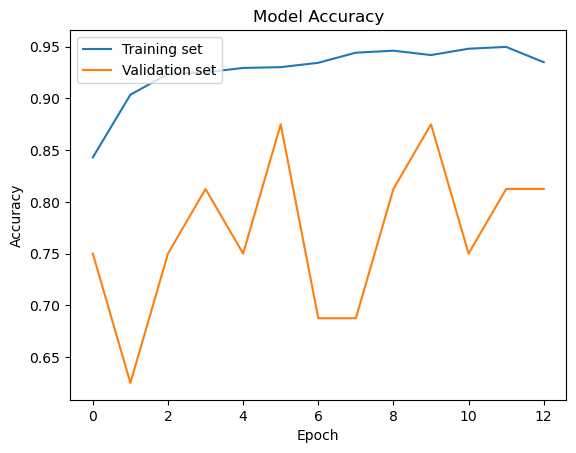

In [16]:
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy']) 
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


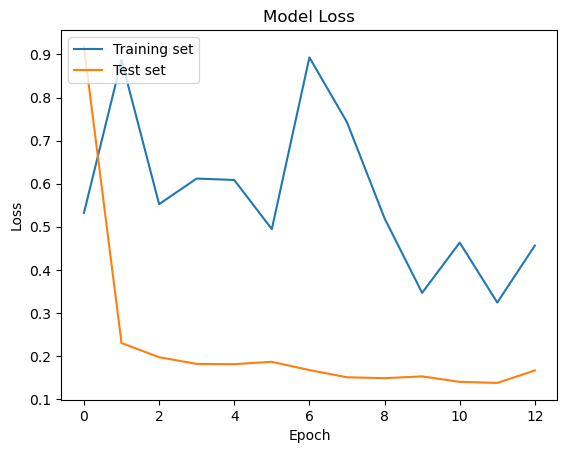

In [17]:
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

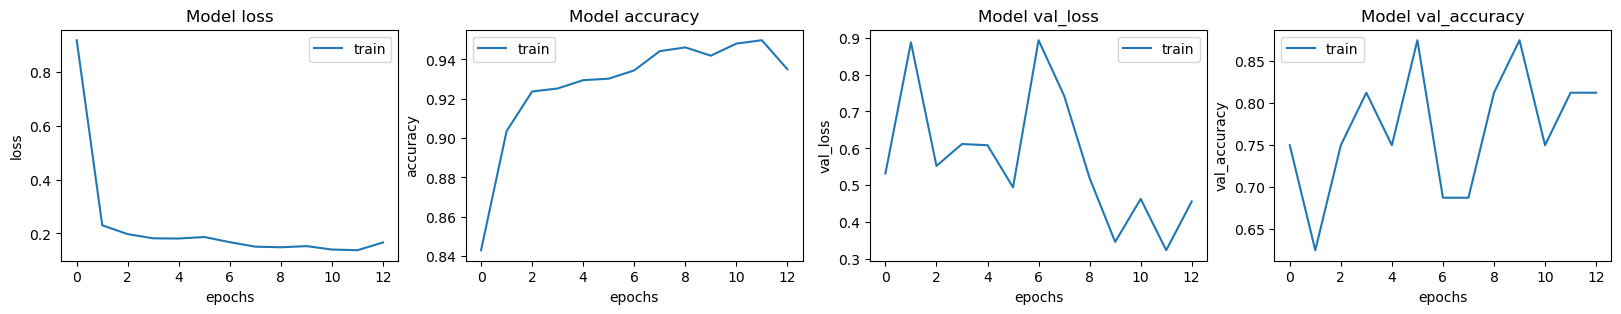

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(['loss', 'accuracy', 'val_loss', 'val_accuracy']):
    ax[i].plot(cnn_model.history[metric])
    ax[i].set_title('Model {}'.format(metric))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(metric)
    ax[i].legend(['train', 'val'])


<Axes: >

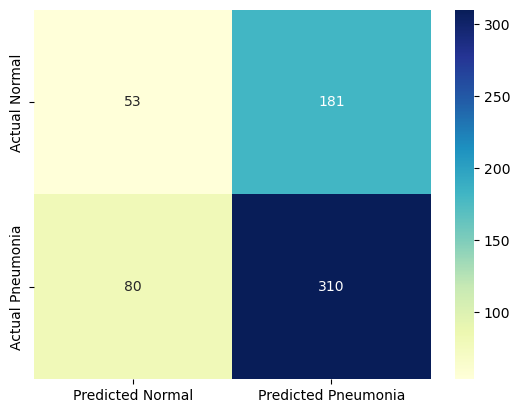

In [19]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test_set.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns

custom_cmap = "YlGnBu"
sns.heatmap(cm, annot=True, fmt="d", cmap=custom_cmap)